In [51]:
#split into train, validation and test set

In [52]:
import numpy as np
import pandas as pd
import os
import shutil
import torchvision.transforms as transforms
import PIL
import matplotlib.pyplot as plt

In [53]:
#add the csv file with the labels
labeling = pd.read_csv("./Original_labels.csv")
labeling

filename  item_type    label
0     100_i110.png        100  plastic
1     100_i120.png        100  plastic
2     100_i130.png        100  plastic
3     100_i140.png        100  plastic
4     100_i150.png        100  plastic
...            ...        ...      ...
7747  997_i180.png        997  plastic
7748  997_i190.png        997  plastic
7749  997_i210.png        997  plastic
7750  997_i230.png        997  plastic
7751  997_i250.png        997  plastic

[7752 rows x 3 columns]

In [54]:
#list of unique item types
unique_item_type = labeling['item_type'].unique()

In [55]:
#shuffle the data based on item_type
item_shuffle = np.random.permutation(unique_item_type)
train_item_type = item_shuffle[:int(len(item_shuffle)*0.8)]
test_item_type = item_shuffle[int(len(item_shuffle)*0.8):int(len(item_shuffle)*0.9)]
val_item_type = item_shuffle[int(len(item_shuffle)*0.9):]

In [56]:
#train test val dataframes
train_df = labeling[labeling['item_type'].isin(train_item_type)]
test_df = labeling[labeling['item_type'].isin(test_item_type)]
val_df = labeling[labeling['item_type'].isin(val_item_type)]

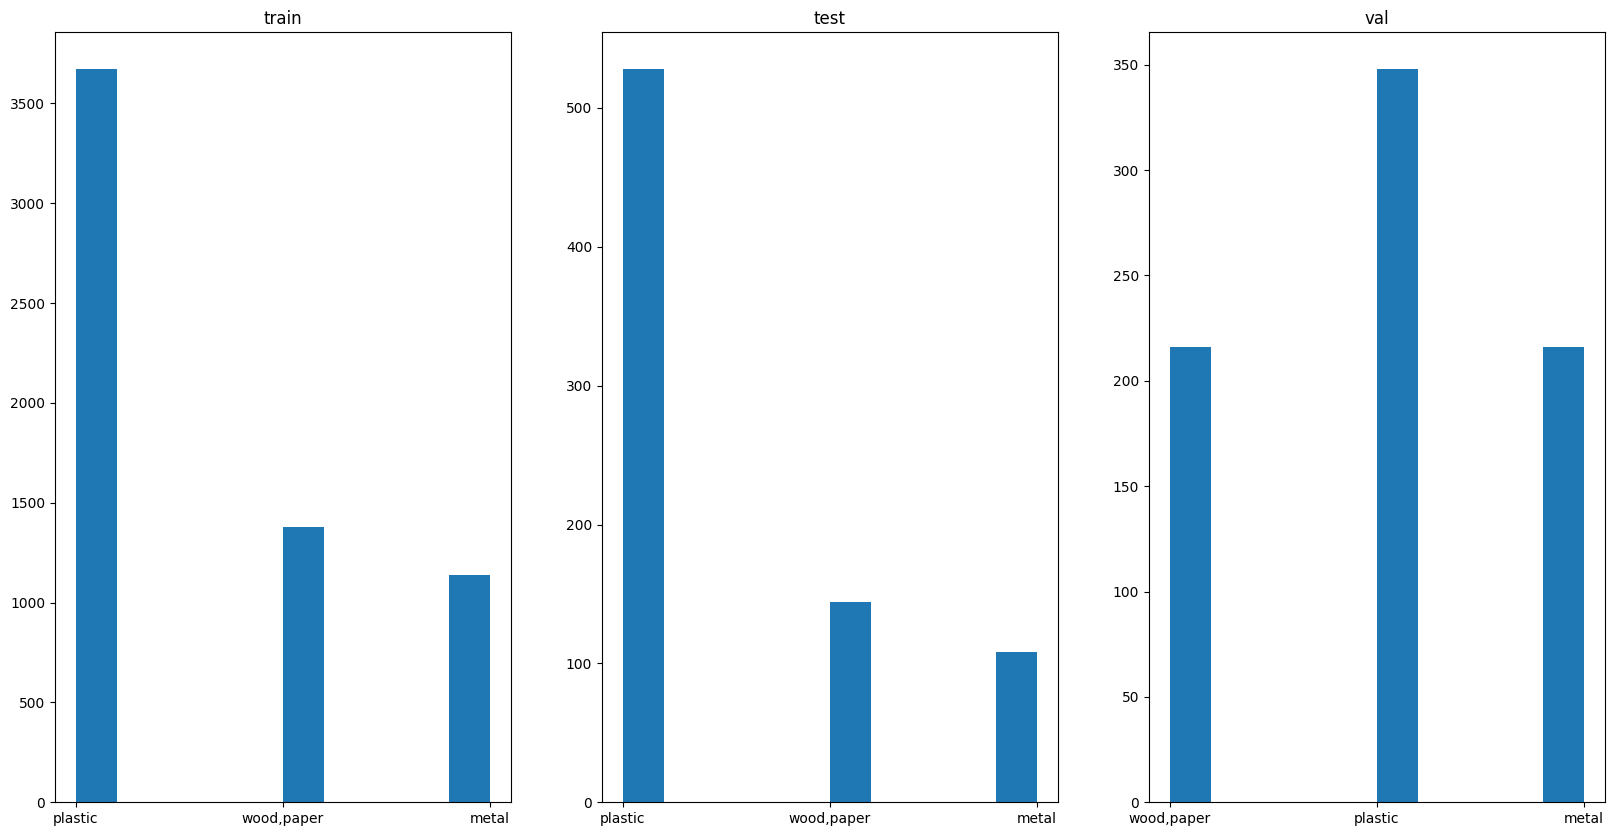

In [57]:
#histogram of the material types train val test
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.hist(train_df['label'])
plt.title('train')
plt.subplot(1,3,2)
plt.hist(test_df['label'])
plt.title('test')
plt.subplot(1,3,3)
plt.hist(val_df['label'])
plt.title('val')
plt.show()


In [58]:
source_dir = './Filtered/'
target_dir = './trainvaltest/'

In [59]:
#remove the target directory if it exists
if (os.path.exists(target_dir)):
    shutil.rmtree(target_dir)

#make the target directory
os.mkdir(target_dir)

In [60]:
#copy files into train/val/test based on split
if (not os.path.exists(target_dir + "train") and not os.path.exists(target_dir + "val") and not os.path.exists(target_dir + "test")):
    os.mkdir(target_dir + "train")
    os.mkdir(target_dir + "val")
    os.mkdir(target_dir + "test")

for item in train_item_type:
    list_item = labeling[labeling['item_type'] == item]
    for index, row in list_item.iterrows():
        shutil.copy(source_dir + row['filename'], target_dir + "train/" + row['filename'])

for item in val_item_type:
    list_item = labeling[labeling['item_type'] == item]
    for index, row in list_item.iterrows():
        shutil.copy(source_dir + row['filename'], target_dir + "val/" + row['filename'])

for item in test_item_type:
    list_item = labeling[labeling['item_type'] == item]
    for index, row in list_item.iterrows():
        shutil.copy(source_dir + row['filename'], target_dir + "test/" + row['filename'])

In [61]:
#we now balance the train set
metal_count = train_df[train_df['label'] == 'metal'].shape[0]
plastic_count = train_df[train_df['label'] == 'plastic'].shape[0]
wood_paper_count = train_df[train_df['label'] == 'wood,paper'].shape[0]

print("metal_count: ", metal_count)
print("plastic_count: ", plastic_count)
print("wood_paper_count: ", wood_paper_count)

metal_count:  1140
plastic_count:  3672
wood_paper_count:  1380


In [64]:
source_dir = './trainvaltest/train/'
target_dir = './trainvaltest/train/'
seed = 42

In [63]:
#sample the metal data
metal_sample = train_df[train_df['label'] == 'metal'].sample(n= (plastic_count - metal_count), random_state=seed, replace=True)
metal_sample

filename  item_type  label
7630  986_i230.png        986  metal
6068  808_i190.png        808  metal
7658   99_i130.png         99  metal
7587  981_i140.png        981  metal
7428  961_i110.png        961  metal
...            ...        ...    ...
2651  405_i250.png        405  metal
3791  531_i250.png        531  metal
5475  737_i140.png        737  metal
939     2_i140.png          2  metal
4142  581_i130.png        581  metal

[2532 rows x 3 columns]

In [65]:
#apply the augmenation
for i in range(len(metal_sample)):
    img = PIL.Image.open(source_dir+metal_sample.iloc[i]['filename'])
    img = transforms.RandAugment()(img)
    item_type = metal_sample.iloc[i]['item_type']
    augname = metal_sample.iloc[i]['filename'][:-4]+'_aug' + str(i) + '.png'
    img.save(source_dir+augname)
    #add to csv
    labeling = labeling.append({'filename': augname, 'item_type': item_type, 'label': 'metal'}, ignore_index=True)
    train_df = train_df.append({'filename': augname, 'item_type': item_type, 'label': 'metal'}, ignore_index=True)

C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\2332391687.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labeling = labeling.append({'filename': augname, 'item_type': item_type, 'label': 'metal'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\2332391687.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'filename': augname, 'item_type': item_type, 'label': 'metal'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\2332391687.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labeling = labeling.append({'filename': augname, 'item_type': item_type, 'label': 'metal'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\2332391687

In [66]:
#sample the wood,paper data
wood_paper_sample = train_df[train_df['label'] == 'wood,paper'].sample(n= (plastic_count - wood_paper_count), random_state=seed, replace=True)
wood_paper_sample

filename  item_type       label
5062   83_i230.png         83  wood,paper
3884  646_i190.png        646  wood,paper
5746  937_i230.png        937  wood,paper
5138  838_i130.png        838  wood,paper
4935  815_i140.png        815  wood,paper
...            ...        ...         ...
609   182_i210.png        182  wood,paper
4470  740_i170.png        740  wood,paper
5489  899_i160.png        899  wood,paper
1105  251_i120.png        251  wood,paper
3456  596_i110.png        596  wood,paper

[2292 rows x 3 columns]

In [67]:
#apply the augmenation
for i in range(len(wood_paper_sample)):
    img = PIL.Image.open(source_dir+wood_paper_sample.iloc[i]['filename'])
    img = transforms.RandAugment()(img)
    item_type = wood_paper_sample.iloc[i]['item_type']
    augname = wood_paper_sample.iloc[i]['filename'][:-4]+'_aug' + str(i) + '.png'
    img.save(source_dir+augname)
    #add to csv
    labeling = labeling.append({'filename': augname, 'item_type': item_type, 'label': 'wood,paper'}, ignore_index=True)
    train_df = train_df.append({'filename': augname, 'item_type': item_type, 'label': 'wood,paper'}, ignore_index=True)

C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\3031990540.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labeling = labeling.append({'filename': augname, 'item_type': item_type, 'label': 'wood,paper'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\3031990540.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'filename': augname, 'item_type': item_type, 'label': 'wood,paper'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\3031990540.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labeling = labeling.append({'filename': augname, 'item_type': item_type, 'label': 'wood,paper'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_2

Text(0.5, 1.0, 'train')

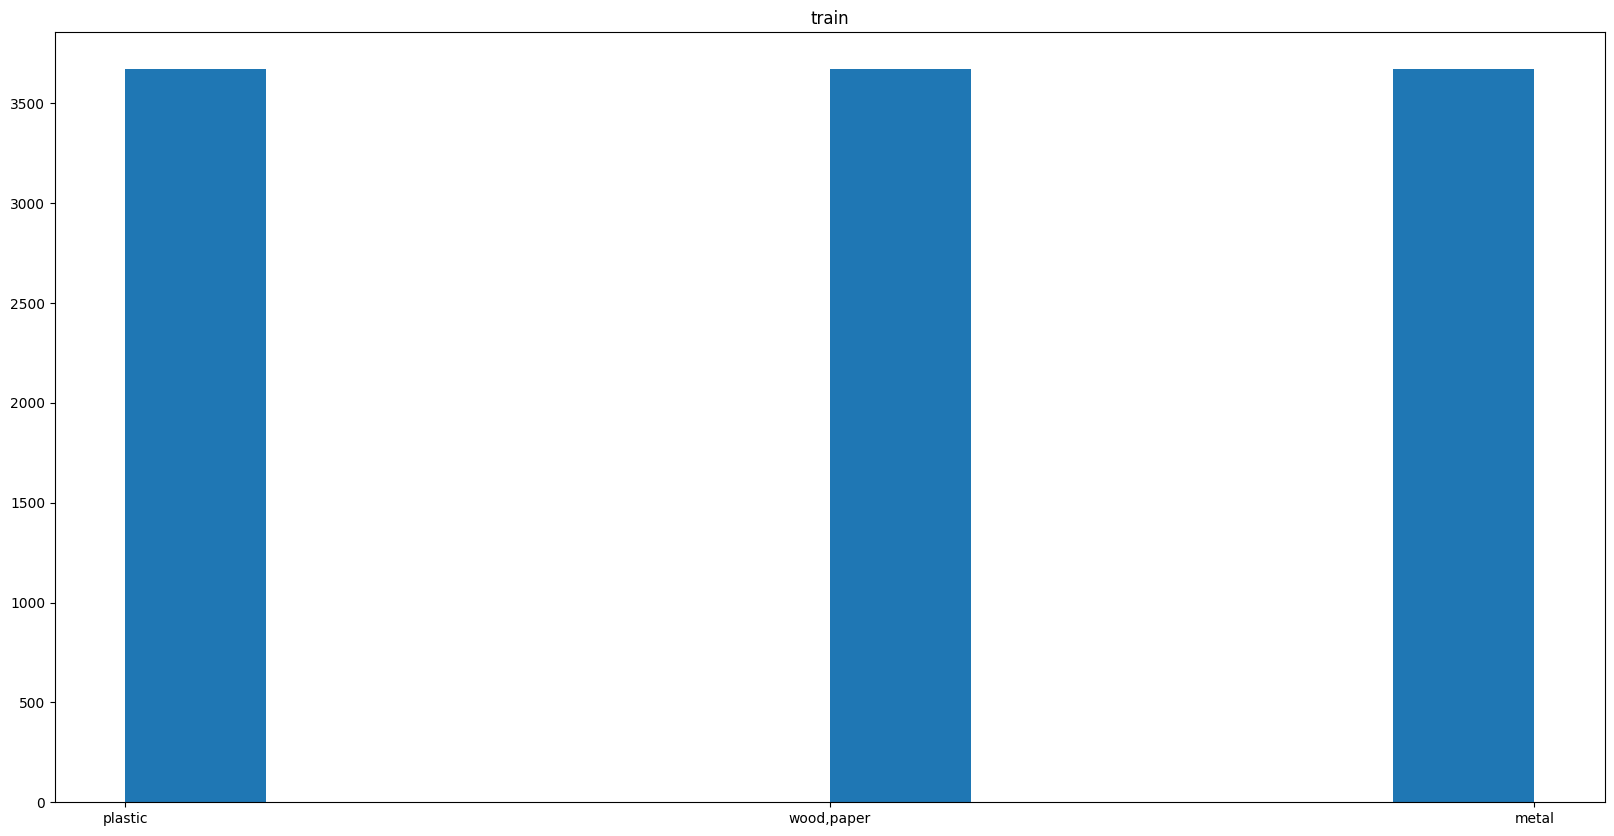

In [68]:
#histogram of the material types train val test
plt.figure(figsize=(20,10))
plt.hist(train_df['label'])
plt.title('train')

In [69]:
#save the new csv
target_dir = './trainvaltest/testtrainvalcsv/'
if (not os.path.exists(target_dir)):
    os.mkdir(target_dir)

labeling.to_csv(target_dir + 'all_labeling.csv', index=False)
train_df.to_csv(target_dir + 'train_labeling.csv', index=False)
test_df.to_csv(target_dir + 'test_labeling.csv', index=False)
val_df.to_csv(target_dir + 'val_labeling.csv', index=False)

In [70]:
#We now augment the train with 2000 images
#technique: random crop, random rotation, random horizontal flip, random vertical flip, random erase
#we will use the same seed for all the random operations
seed = 42

In [71]:
source_dir = "./trainvaltest/train/"
pd_label = pd.read_csv("./trainvaltest/testtrainvalcsv/train_labeling.csv")
augment_count = 2000

In [72]:
transforms_list = transforms.Compose([
    transforms.RandomResizedCrop(144, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333)),
    transforms.RandomHorizontalFlip(),transforms.RandomVerticalFlip(),
    transforms.RandomRotation(90),transforms.RandomRotation(180),transforms.RandomRotation(270),
     transforms.RandomVerticalFlip(), transforms.RandomHorizontalFlip()])

In [73]:
#sample plastic
plastic_sample = train_df[train_df['label'] == 'plastic'].sample(n=augment_count, random_state=seed, replace=True)
plastic_sample

filename  item_type    label
5226   85_i170.png         85  plastic
5883   96_i140.png         96  plastic
1520  323_i190.png        323  plastic
2146  409_i230.png        409  plastic
1934  383_i130.png        383  plastic
...            ...        ...      ...
3222  554_i170.png        554  plastic
5973  966_i210.png        966  plastic
4098  676_i170.png        676  plastic
4429  736_i120.png        736  plastic
1485  318_i210.png        318  plastic

[2000 rows x 3 columns]

In [74]:
#apply the augmenation
for i in range(len(plastic_sample)):
    img = PIL.Image.open(source_dir+plastic_sample.iloc[i]['filename'])
    img = transforms_list(img)
    item_type = plastic_sample.iloc[i]['item_type']
    augname = plastic_sample.iloc[i]['filename'][:-4]+'_augX' + str(i) + '.png'
    img.save(source_dir+augname)
    #add to csv
    labeling = labeling.append({'filename': augname, 'item_type': item_type, 'label': 'plastic'}, ignore_index=True)
    train_df = train_df.append({'filename': augname, 'item_type': item_type, 'label': 'plastic'}, ignore_index=True)

C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\1797727102.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labeling = labeling.append({'filename': augname, 'item_type': item_type, 'label': 'plastic'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\1797727102.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'filename': augname, 'item_type': item_type, 'label': 'plastic'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\1797727102.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labeling = labeling.append({'filename': augname, 'item_type': item_type, 'label': 'plastic'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\1797

In [75]:
#sample metal
metal_sample = train_df[train_df['label'] == 'metal'].sample(n=augment_count, random_state=seed, replace=True)
metal_sample

filename  item_type  label
8226   77_i110_aug2034.png         77  metal
8559  955_i180_aug2367.png        955  metal
4880          808_i190.png        808  metal
6346    11_i120_aug154.png         11  metal
6098           99_i130.png         99  metal
...                    ...        ...    ...
6966    20_i160_aug774.png         20  metal
8613  434_i210_aug2421.png        434  metal
7518  640_i180_aug1326.png        640  metal
7789   20_i120_aug1597.png         20  metal
4857          805_i210.png        805  metal

[2000 rows x 3 columns]

In [76]:
#apply the augmenation
for i in range(len(metal_sample)):
    img = PIL.Image.open(source_dir+metal_sample.iloc[i]['filename'])
    img = transforms_list(img)
    item_type = metal_sample.iloc[i]['item_type']
    augname = metal_sample.iloc[i]['filename'][:-4]+'_augX' + str(i) + '.png'
    img.save(source_dir+augname)
    #add to csv
    labeling = labeling.append({'filename': augname, 'item_type': item_type, 'label': 'metal'}, ignore_index=True)
    train_df = train_df.append({'filename': augname, 'item_type': item_type, 'label': 'metal'}, ignore_index=True)

C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\4077457074.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labeling = labeling.append({'filename': augname, 'item_type': item_type, 'label': 'metal'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\4077457074.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'filename': augname, 'item_type': item_type, 'label': 'metal'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\4077457074.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labeling = labeling.append({'filename': augname, 'item_type': item_type, 'label': 'metal'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\4077457074

In [77]:
#sample wood,paper
wood_paper_sample = train_df[train_df['label'] == 'wood,paper'].sample(n=augment_count, random_state=seed, replace=True)
wood_paper_sample

filename  item_type       label
10518  759_i160_aug1794.png        759  wood,paper
10851   94_i190_aug2127.png         94  wood,paper
3884           646_i190.png        646  wood,paper
5746           937_i230.png        937  wood,paper
5138           838_i130.png        838  wood,paper
...                     ...        ...         ...
9258    326_i110_aug534.png        326  wood,paper
10905  493_i250_aug2181.png        493  wood,paper
9810   838_i120_aug1086.png        838  wood,paper
10081  780_i190_aug1357.png        780  wood,paper
3861           641_i210.png        641  wood,paper

[2000 rows x 3 columns]

In [78]:
#apply the augmenation
for i in range(len(wood_paper_sample)):
    img = PIL.Image.open(source_dir+wood_paper_sample.iloc[i]['filename'])
    img = transforms_list(img)
    item_type = wood_paper_sample.iloc[i]['item_type']
    augname = wood_paper_sample.iloc[i]['filename'][:-4]+'_augX' + str(i) + '.png'
    img.save(source_dir+augname)
    #add to csv
    labeling = labeling.append({'filename': augname, 'item_type': item_type, 'label': 'wood,paper'}, ignore_index=True)
    train_df = train_df.append({'filename': augname, 'item_type': item_type, 'label': 'wood,paper'}, ignore_index=True)

C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\504187053.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labeling = labeling.append({'filename': augname, 'item_type': item_type, 'label': 'wood,paper'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\504187053.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'filename': augname, 'item_type': item_type, 'label': 'wood,paper'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_25772\504187053.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labeling = labeling.append({'filename': augname, 'item_type': item_type, 'label': 'wood,paper'}, ignore_index=True)
C:\Users\Frank\AppData\Local\Temp\ipykernel_2577

In [79]:
#save the new csv
target_dir = './trainvaltest/testtrainvalcsv/'

labeling.to_csv(target_dir + 'all_labeling.csv', index=False)
train_df.to_csv(target_dir + 'train_labeling.csv', index=False)